In [1]:
from badsproject import BADS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import scale
import seaborn as sns
%matplotlib inline

In [16]:
a = BADS()
a.create_datasets(use_woe = True)
a.set_model("gbc")
a.automatic_feature_selection = True
a.automagic_feature_selection()

Imposing train column structure on test...
Starting automatic feature selection...
      Iter       Train Loss   Remaining Time 
         1           0.9634           25.80s
         2           0.9600           22.11s
         3           0.9569           20.23s
         4           0.9537           18.80s
         5           0.9514           18.18s
         6           0.9492           17.53s
         7           0.9468           16.79s
         8           0.9449           16.32s
         9           0.9431           15.97s
        10           0.9412           15.76s
        20           0.9297           11.76s
        30           0.9220            7.86s
        40           0.9169            3.91s
        50           0.9132            0.00s
High Importance Features: account_creation_date, newsletter, delivery, coupon, goods_value, referrer, cost_shipping, deliverydate_estimated, deliverydate_actual, weight, remitted_items, used_items, book_count, paperback_count, schoolbook_cou

In [17]:
X, y = a.X_train, a.y_train
idx = np.random.choice(range(X.shape[0]), size=2000)
X, y = scale(X[idx, :]), y[idx]


/home/david/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


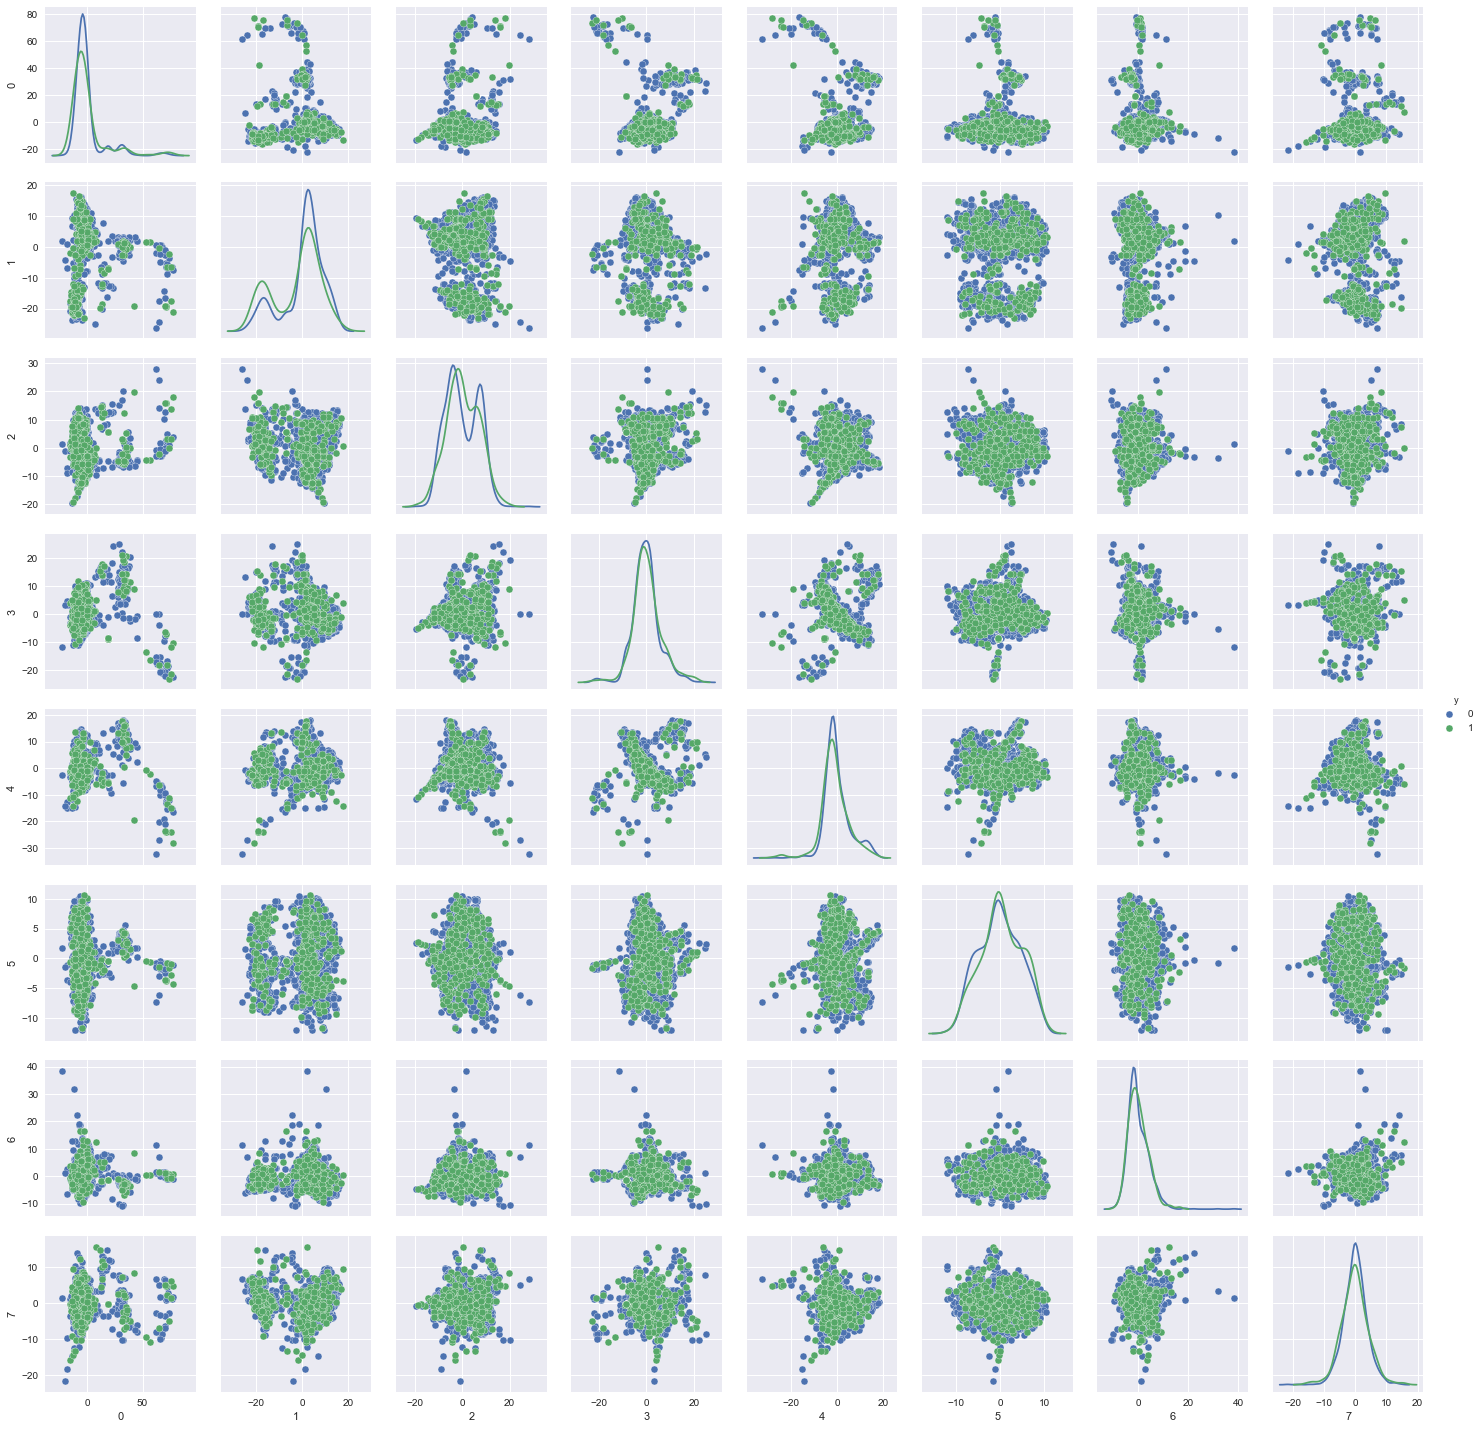

In [19]:
num_PC = 8
iso = Isomap(n_components=num_PC)
data_projected = iso.fit_transform(X)
data_projected = pd.DataFrame(data_projected)
data_projected['y'] = y
sns.pairplot(pd.DataFrame(data_projected), vars=data_projected.columns[:num_PC], hue='y', diag_kind="kde")

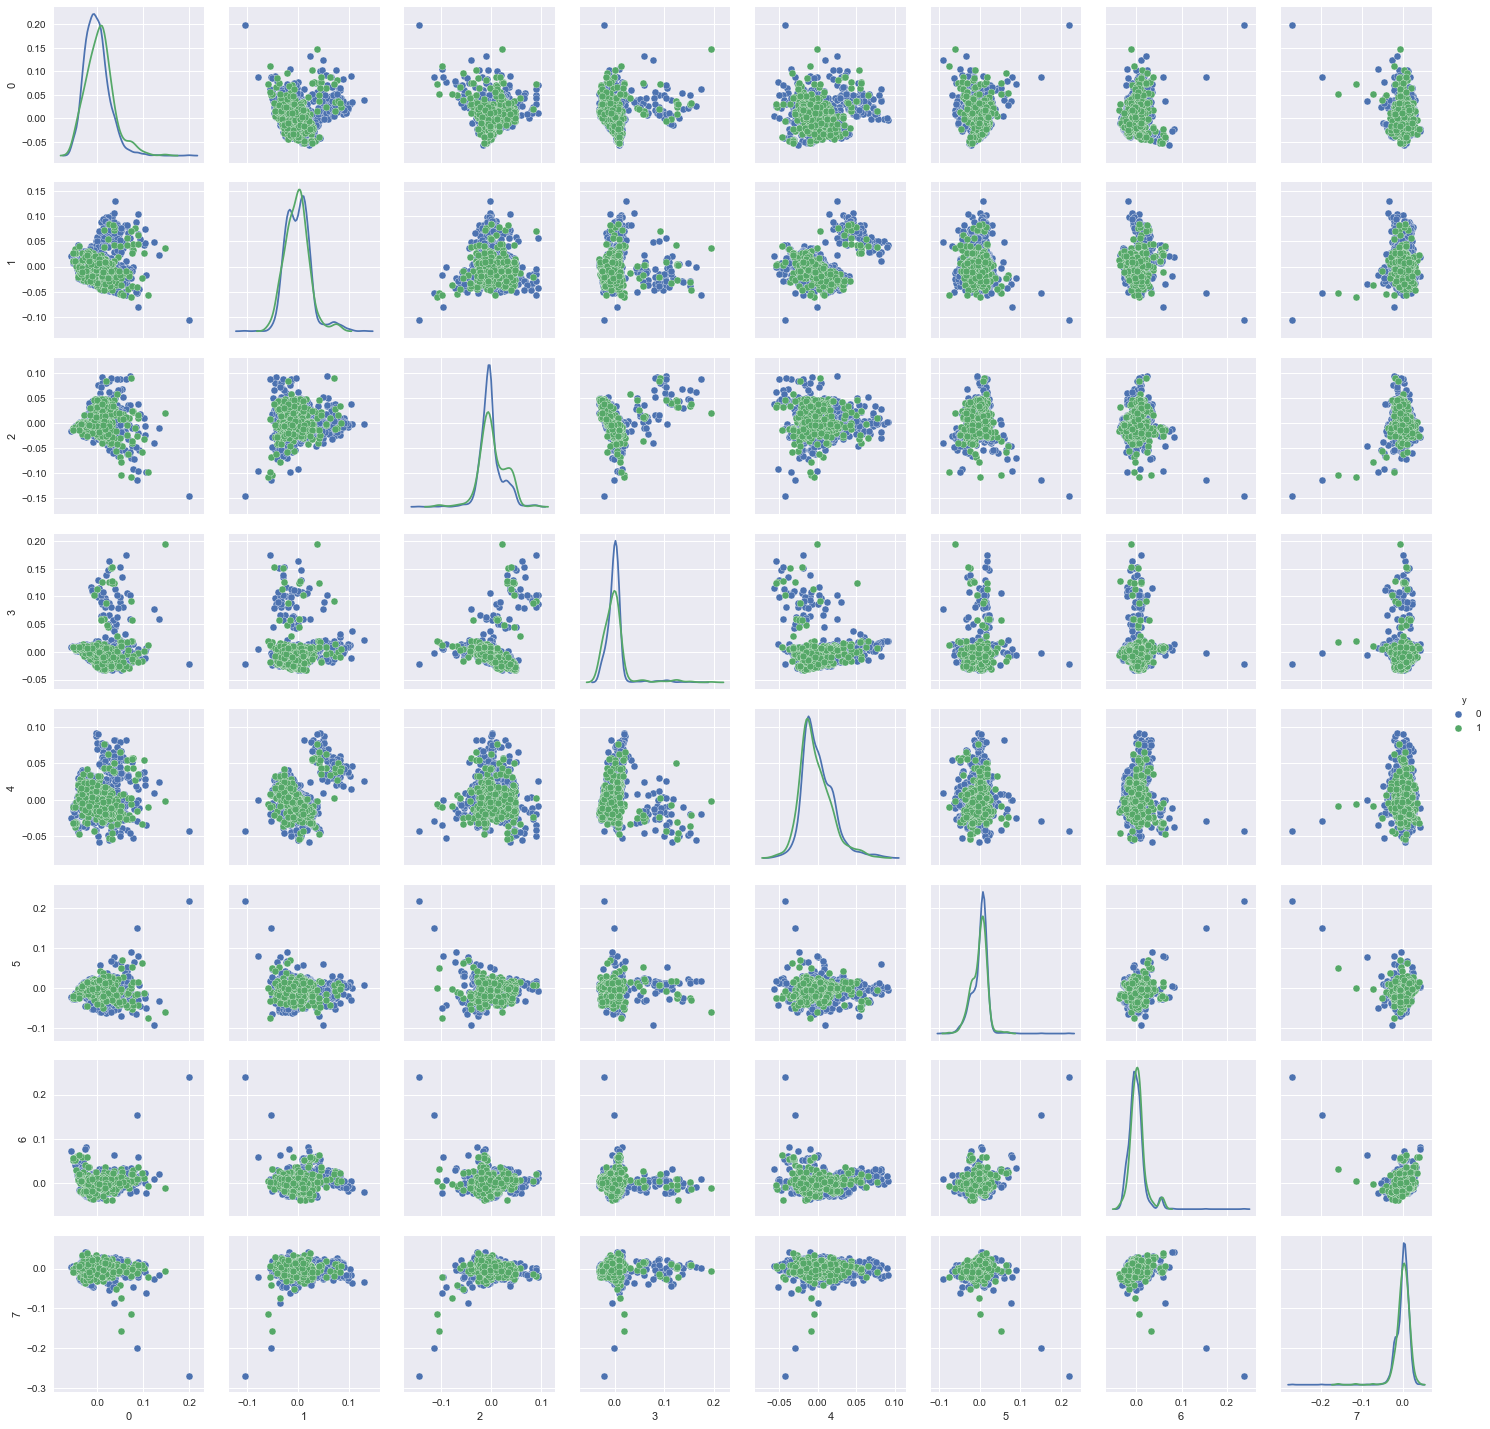

In [20]:
num_PC = 8
kpca = KernelPCA(n_components=num_PC, kernel="rbf", coef0=50, gamma=1e-4)
data_projected = kpca.fit_transform(X)
data_projected = pd.DataFrame(data_projected)
data_projected['y'] = y
sns.pairplot(pd.DataFrame(data_projected), vars=data_projected.columns[:num_PC], hue='y', diag_kind="kde")